In [ ]:
# Objetivos
# - Conocer el funcionamiento de la librerìa sklearn de Machine Learning
# - Aplicar la librerìa sklearn para solucionar problemas de Machine Learning

In [ ]:
# pip install -U scikit-learn

In [5]:
from sklearn import __version__ as vsn
print(vsn)

1.4.1.post1


In [ ]:
# Historia
# Nace en 2007, como un Google Summer Project de David Cournapeau.
# Retomado por Matthieu Brucher para su proyecto de tesis.
# Desde 2010 con soporte por parte de INRIA.
# Actualmente +35 colaboradores.

# 1. Sobre la librería sklearn
# ¿Porqué sklearn?
# - sklearn viene de scientific toolbox for Machine Learning.
# - scikit learn para los amigos.
# - Existen múltiples scikits, que son "scientific toolboxes" construidos sobre SciPy: https://scikits.appspot.com/scikits.
# - Primero que nada... ¿Qué es Machine Learning?

In [ ]:
# 2. Machine Learning, es una rama de la inteligencia artificial que se enfoca en el diseño y desarrollo de algoritmos que permiten a las computadoras aprender a partir de datos.
# Definiciones de Machine Learning
# - Los datos utilizados para predecir son predictores (features), y típicamente se llama X.
# - El dato que se busca predecir se llama etiqueta (label) y puede ser numérica o categórica, y típicamente se llama y.
# Ejemplo
# Consideremos un dataset consistente en características de diversos animales.
## patas,   ancho,   largo,   alto,    peso,        especie
## [numero],[metros],[metros],[metros],[kilogramos],[]
## 2,       0.6,     0.4,     1.7,     75,          humano
## 2,       0.6,     0.4,     1.8,     90,          humano
## ...
## 2,       0.5,     0.5,     1.7,     85,          humano
## 4,       0.2,     0.5,     0,3,     30,          gato
## ...
## 4,       0.25,    0.55,    0.32,    32,          gato
## 4,       0.5,     0.8,     0.3,     50,          perro
## ...
## 4,       0.4,     0.4,     0.32,    40,          perro
# Clustering, es una técnica de Machine Learning que permite agrupar datos similares en grupos.
# - Supongamos que no nos han dicho la especie de cada animal.
# - ¿Podríamos reconocer las distintas especies?
# - ¿Podríamos reconocer que existen 3 grupos distintos de animales?
# Regresión, es una técnica de Machine Learning que permite predecir datos.
# - Supongamos que conocemos los datos de cada animal y su especie.
# - Si alguien llega con los datos de un animal, excepto el peso... ¿podemos predecir el peso que tendrá el animal?

In [ ]:
# 3. Generalidades de sklearn
# ![Alt Text](IMG/sickit-learn.png)
# Procedimiento General: 
## split data into train and test datasets
## train model with train dataset
## compute error on test dataset
## Optional: Train model with all available data
## Use model for some  prediction

In [ ]:
# 4. Clustering con Sklearn
# Wine Dataset
# Los datos del Wine Dataset son un conjunto de datos clásicos para verificar los algoritmos de clustering.
# Los datos corresponden a 3 cultivos diferentes de vinos de la misma región de Italia, y que han sido identificados con las etiquetas 1, 2 y 3.
# Para cada tipo de vino se realizado 13 análisis químicos:
# - Alcohol
# - Malic acid
# - Ash
# - Alcalinity of ash
# - Magnesium
# - Total phenols
# - Flavanoids
# - Nonflavanoid phenols
# - Proanthocyanins
# - Color intensity
# - Hue
# - OD280/OD315 of diluted wines
# - Proline
# La base de datos contiene 178 muestras distintas en total.

In [14]:
# Lectura de datos
import pandas as pd
data = pd.read_csv("data/wine_data.csv")
data

,class,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,OD280-OD315_of_diluted_wines,proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [16]:
# Exploración de datos
data.columns

Index(['class', 'alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash',
       'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'OD280-OD315_of_diluted_wines', 'proline    '],
      dtype='object')

In [17]:
data["class"].value_counts()

class
2    71
1    59
3    48
Name: count, dtype: int64

In [18]:
data.describe(include="all")

,class,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,OD280-OD315_of_diluted_wines,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


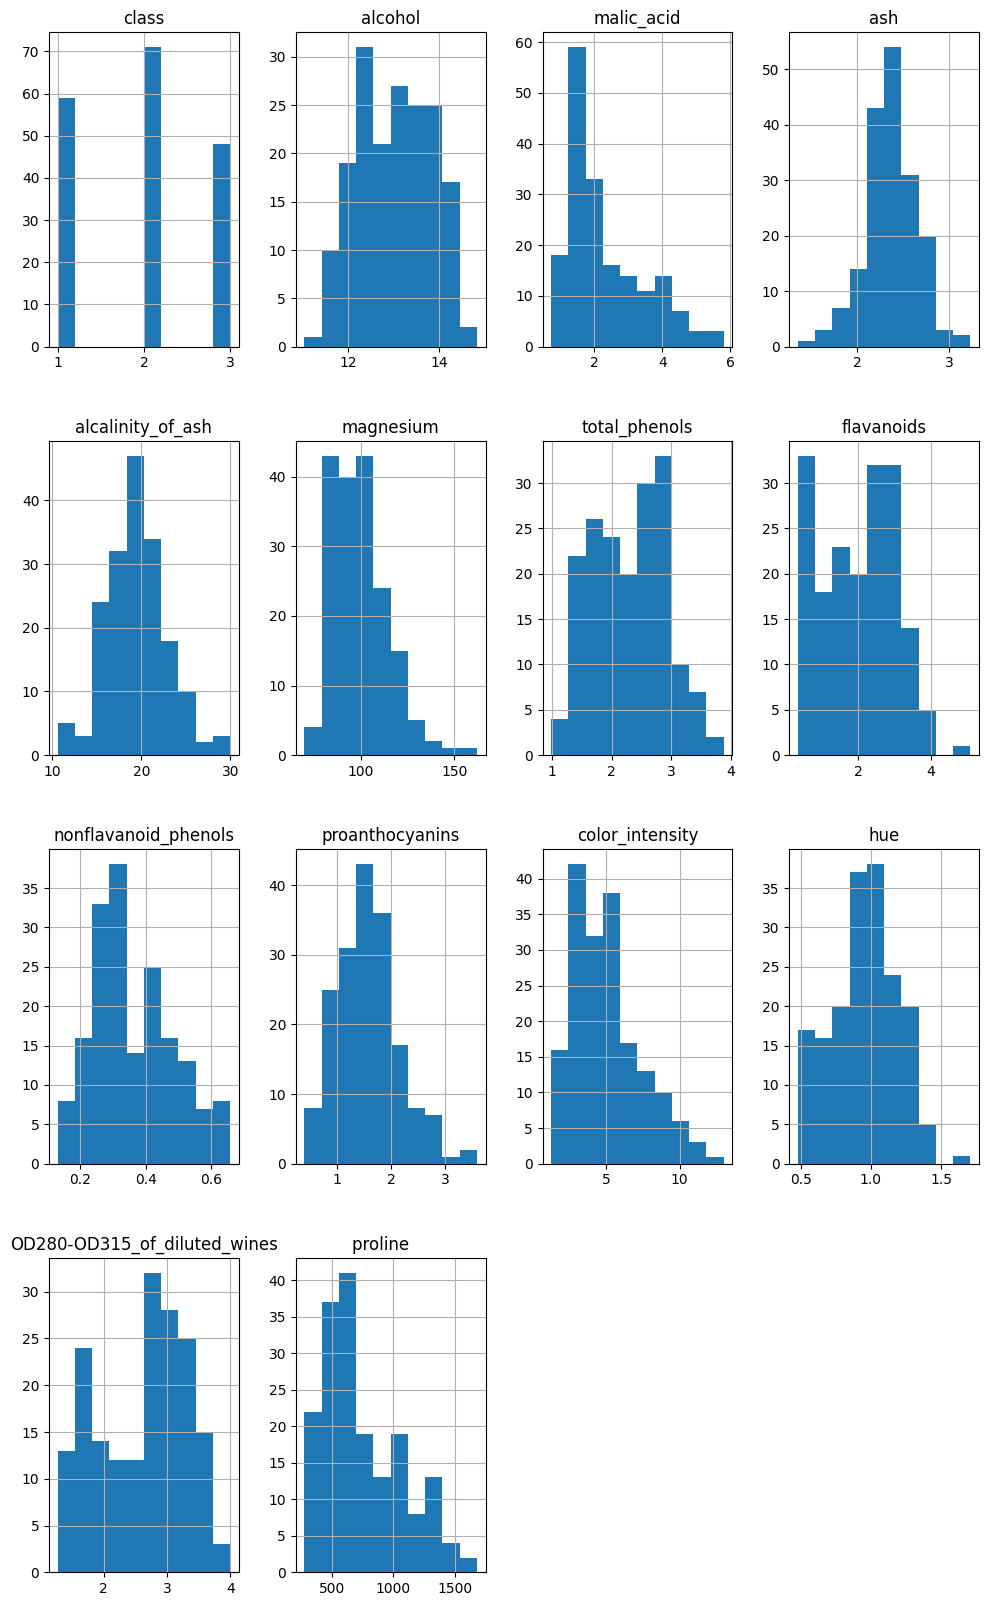

In [20]:
# Exploración gráfica de datos
from matplotlib import pyplot as plt
data.hist(figsize=(12,20))
plt.show()

In [23]:
# Separación de los datos
# Necesitamos separar los datos en los predictores (features) y las etiquetas (labels)

X = data.drop("class", axis=1)
true_labels = data["class"] -1 # labels deben ser 0, 1, 2, ..., n-1

In [24]:
# Magnitudes de los datos
print(X.mean())
print(X.std())

alcohol                          13.000618
malic_acid                        2.336348
ash                               2.366517
alcalinity_of_ash                19.494944
magnesium                        99.741573
total_phenols                     2.295112
flavanoids                        2.029270
nonflavanoid_phenols              0.361854
proanthocyanins                   1.590899
color_intensity                   5.058090
hue                               0.957449
OD280-OD315_of_diluted_wines      2.611685
proline                         746.893258
dtype: float64
alcohol                           0.811827
malic_acid                        1.117146
ash                               0.274344
alcalinity_of_ash                 3.339564
magnesium                        14.282484
total_phenols                     0.625851
flavanoids                        0.998859
nonflavanoid_phenols              0.124453
proanthocyanins                   0.572359
color_intensity                   2.318

In [25]:
# Algoritmo de Clustering
# - Para Clustering usaremos el algoritmo KMeans.
# - Apliquemos un algoritmo de clustering directamente
from sklearn.cluster import KMeans # Se importa la clase KMeans de la librería sklearn, que es el algoritmo de clustering que se va a utilizar
from sklearn.metrics import confusion_matrix # Se importa la función confusion_matrix de la librería sklearn.metrics, que se va a utilizar para evaluar el algoritmo de clustering

# Parameters
n_clusters = 3

# Running the algorithm
kmeans = KMeans(n_clusters) # Se crea el objeto kmeans con n_clusters = 3, es decir, se le está diciendo al algoritmo que se esperan 3 clusters, ya que se sabe que hay 3 clases en el dataset original
kmeans.fit(X) # Entrenamiento del algoritmo, se le pasan los datos de entrenamiento X
pred_labels = kmeans.labels_ # labels obtenidas por el algoritmo, deben ser 0, 1, 2, ..., n-1, donde n es el número de clusters, en este caso 3, ya que n_clusters = 3

cm = confusion_matrix(true_labels, pred_labels) # confusion matrix es una matriz cuadrada de n x n donde n es el número de clases en el dataset original y cada celda (i,j) representa el número de elementos de la clase i que fueron clasificados como clase j.
print(cm) # La diagonal de la matriz representa los elementos que fueron clasificados correctamente, mientras que los elementos fuera de la diagonal representan los elementos que fueron clasificados incorrectamente.

[[ 1 27 31]
 [64  0  7]
 [37  0 11]]


In [26]:
# Normalizacion de datos
# - Resulta conveniente escalar los datos, para que el algoritmo de clustering funcione mejor

# Se importa el módulo preprocessing de la librería sklearn, que contiene funciones para preprocesar los datos
from sklearn import preprocessing

# Se escalan los datos X, se obtiene un nuevo conjunto de datos X_scaled, que es una versión escalada de X, donde cada columna tiene media 0 y desviación estándar 1, lo que facilita el trabajo del algoritmo de clustering
X_scaled = preprocessing.scale(X)
print(X_scaled.mean())  # Se imprime la media de los datos escalados
print(X_scaled.std())  # Se imprime la desviación estándar de los datos escalados

-1.2282501914608474e-16
1.0


In [27]:
# Algoritmo de Clustering
# - Ahora podemos aplicar un algoritmo de clustering

from sklearn.cluster import KMeans # Se importa la clase KMeans de la librería sklearn, que es el algoritmo de clustering que se va a utilizar
from sklearn.metrics import confusion_matrix # Se importa la función confusion_matrix de la librería sklearn.metrics, que se va a utilizar para evaluar el algoritmo de clustering

# Parameters
n_clusters = 3

# Running the algorithm
kmeans = KMeans(n_clusters) # Se crea el objeto kmeans con n_clusters = 3, es decir, se le está diciendo al algoritmo que se esperan 3 clusters, ya que se sabe que hay 3 clases en el dataset original
kmeans.fit(X_scaled) # Entrenamiento del algoritmo, se le pasan los datos de entrenamiento X_scaled
pred_labels = kmeans.labels_ # labels obtenidas por el algoritmo, deben ser 0, 1, 2, ..., n-1, donde n es el número de clusters, en este caso 3, ya que n_clusters = 3
 
cm = confusion_matrix(true_labels, pred_labels) # confusion matrix es una matriz cuadrada de n x n donde n es el número de clases en el dataset original y cada celda (i,j) representa el número de elementos de la clase i que fueron clasificados como clase j.
print(cm) # La diagonal de la matriz representa los elementos que fueron clasificados correctamente, mientras que los elementos fuera de la diagonal representan los elementos que fueron clasificados incorrectamente.

[[ 0 59  0]
 [65  3  3]
 [ 0  0 48]]


In [30]:
# Regla del codo
# - En todos los casos hemos utilizado que el número de clusters es igual a 3. En caso que no conociéramos este dato, deberíamos graficar la suma de las distancias a los clusters para cada punto, en función del número de clusters.

from sklearn.cluster import KMeans

clusters = range(2,20) # Se crea una lista de números de clusters de 2 a 19
total_distance = [] # Se crea una lista vacía para almacenar las distancias totales de los puntos a los clusters para cada número de clusters 
for n_clusters in clusters: # Se itera sobre los números de clusters
    kmeans = KMeans(n_clusters) # Se crea el objeto kmeans con el número de clusters correspondiente
    kmeans.fit(X_scaled) # Se entrena el algoritmo con los datos escalados
    pred_labels = kmeans.labels_ # Se obtienen las etiquetas predichas por el algoritmo
    centroids = kmeans.cluster_centers_ # Se obtienen los centroides de los clusters
    # Get the distances
    distance_for_n = 0 # Se inicializa la variable distance_for_n en 0
    for k in range(n_clusters): # Se itera sobre los clusters
        points = X_scaled[pred_labels==k] # Se obtienen los puntos que pertenecen al cluster k
        aux = (points - centroids[k,:])**2 # Se calcula la distancia al cuadrado de cada punto al centroide del cluster
        distance_for_n += (aux.sum(axis=1)**0.5).sum() # Se suman las distancias de los puntos al centroide del cluster
    total_distance.append(distance_for_n) # Se añade la distancia total al final de la lista total_distance


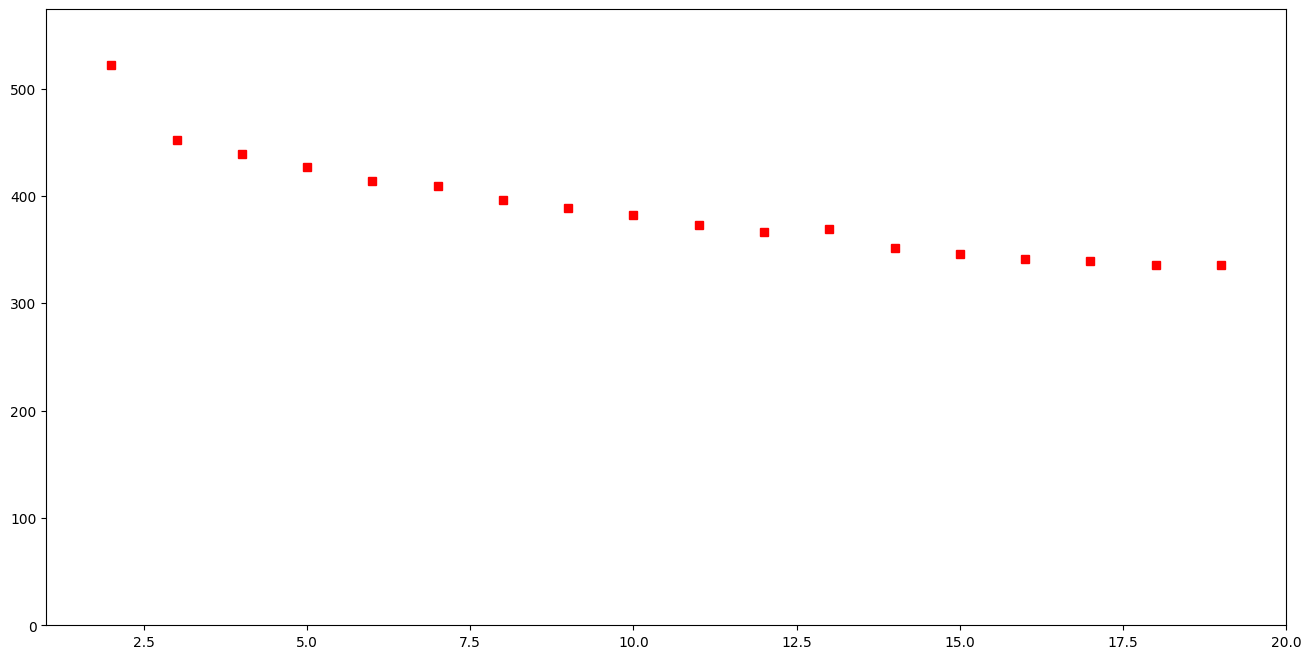

In [33]:
# Graficando lo anterior, obtenemos
from matplotlib import pyplot as plt # Se importa el módulo pyplot de la librería matplotlib, que se va a utilizar para graficar los resultados

fig = plt.figure(figsize=(16,8) ) # Se crea una figura de tamaño 16x8
plt.plot(clusters, total_distance, 'rs') # Se grafica la distancia total en función del número de clusters
plt.xlim(min(clusters)-1, max(clusters)+1 ) # Se establece el rango del eje x
plt.ylim(0, max(total_distance)*1.1) # Se establece el rango del eje y
plt.show() # Se muestra la gráfica

In [ ]:
# ¿Qué tan dificil es usar otro algoritmo de clustering?
# Nada dificil.
# Algoritmos disponibles:
# K-Means
# Mini-batch K-means
# Affinity propagation
# Mean-shift
# Spectral clustering
# Ward hierarchical clustering
# Agglomerative clustering
# DBSCAN
# Gaussian mixtures
# Birch
# Lista con detalles: http://scikit-learn.org/stable/modules/clustering.html

In [34]:
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing

# Normalization of data
X_scaled = preprocessing.scale(X)

# Running the algorithm
kmeans = KMeans(n_clusters=3)
kmeans.fit(X_scaled)
pred_labels = kmeans.labels_

# Evaluating the output
cm = confusion_matrix(true_labels, pred_labels)
print(cm)

[[ 0 59  0]
 [63  5  3]
 [ 0  0 48]]


In [35]:
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing

# Normalization of data
X_scaled = preprocessing.scale(X)

# Running the algorithm
kmeans = MiniBatchKMeans(n_clusters=3)
kmeans.fit(X_scaled)
pred_labels = kmeans.labels_

# Evaluating the output
cm = confusion_matrix(true_labels, pred_labels)
print(cm)

[[59  0  0]
 [ 3  3 65]
 [ 0 48  0]]


In [36]:
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing

# Normalization of data
X_scaled = preprocessing.scale(X)

# Running the algorithm
kmeans = MiniBatchKMeans(n_clusters=3)
kmeans.fit(X_scaled)
pred_labels = kmeans.labels_

# Evaluating the output
cm = confusion_matrix(true_labels, pred_labels)
print(cm)

[[59  0  0]
 [ 8  2 61]
 [ 0 48  0]]


In [ ]:
# Clasificación: 
# Reconocimiento de dígitos
# Los datos se encuentran en 2 archivos, data/optdigits.train y data/optdigits.test.
# Como su nombre lo indica, el set data/optdigits.train contiene los ejemplos que deben ser usados para entrenar el modelo, mientras que el set data/optdigits.test se utilizará para obtener una estimación del error de predicción.
# Ambos archivos comparten el mismo formato: cada línea contiene 65 valores. Los 64 primeros corresponden a la representación de la imagen en escala de grises (0-blanco, 255-negro), y el valor 65 corresponde al dígito de la imágen (0-9).

In [38]:
# Cargando los datos
# Para cargar los datos, utilizamos np.loadtxt con los parámetros extra delimiter (para indicar que el separador será en esta ocasión una coma) y con el dype np.int8 (para que su representación en memoria sea la mínima posible, 8 bits en vez de 32/64 bits para un float).

import numpy as np

XY_tv = np.loadtxt("data/optdigits.train", delimiter=",", dtype=np.int8)
print(XY_tv)
X_tv = XY_tv[:,:64]
Y_tv = XY_tv[:, 64]

print(X_tv.shape)
print(Y_tv.shape)
print(X_tv[0,:])
print(X_tv[0,:].reshape(8,8))
print(Y_tv[0])


[[ 0  1  6 ...  0  0  0]
 [ 0  0 10 ...  0  0  0]
 [ 0  0  8 ...  0  0  7]
 ...
 [ 0  0  3 ...  0  0  6]
 [ 0  0  6 ...  5  0  6]
 [ 0  0  2 ...  0  0  7]]
(3823, 64)
(3823,)
[ 0  1  6 15 12  1  0  0  0  7 16  6  6 10  0  0  0  8 16  2  0 11  2  0
  0  5 16  3  0  5  7  0  0  7 13  3  0  8  7  0  0  4 12  0  1 13  5  0
  0  0 14  9 15  9  0  0  0  0  6 14  7  1  0  0]
[[ 0  1  6 15 12  1  0  0]
 [ 0  7 16  6  6 10  0  0]
 [ 0  8 16  2  0 11  2  0]
 [ 0  5 16  3  0  5  7  0]
 [ 0  7 13  3  0  8  7  0]
 [ 0  4 12  0  1 13  5  0]
 [ 0  0 14  9 15  9  0  0]
 [ 0  0  6 14  7  1  0  0]]
0


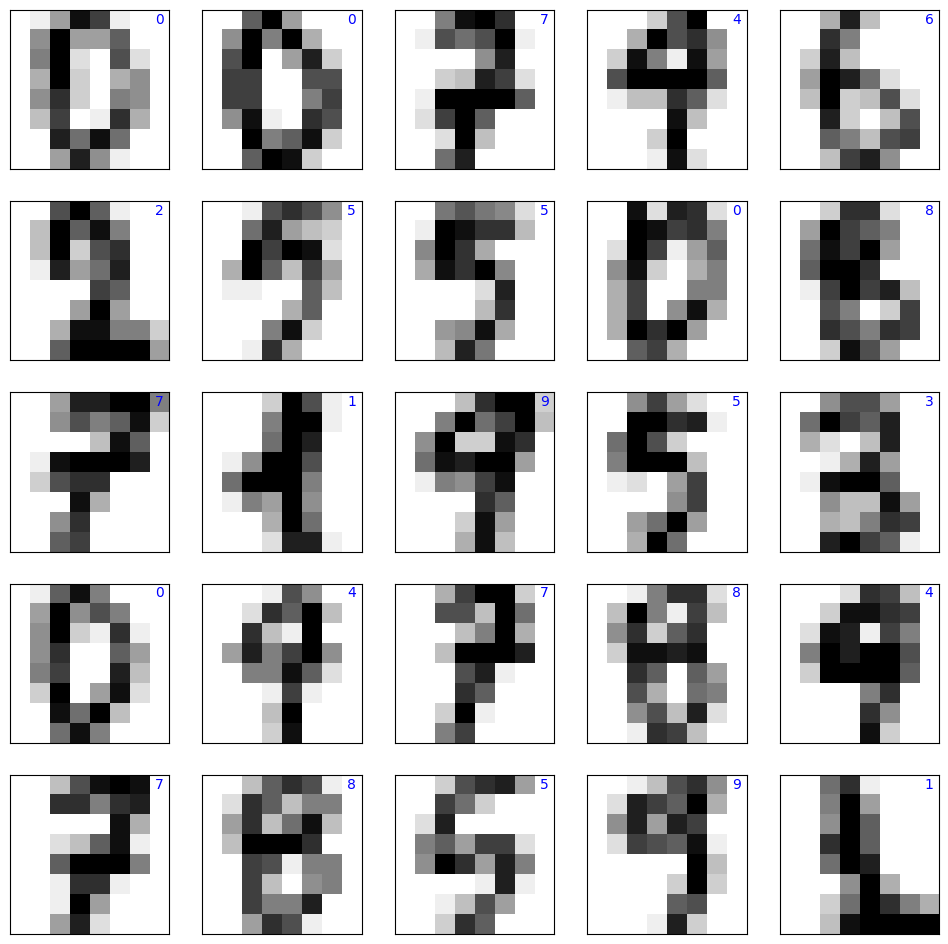

In [39]:
# Visualizando los datos
# Para visualizar los datos utilizaremos el método imshow de pyplot. Resulta necesario convertir el arreglo desde las dimensiones (1,64) a (8,8) para que la imagen sea cuadrada y pueda distinguirse el dígito. Superpondremos además el label correspondiente al dígito, mediante el método text. Realizaremos lo anterior para los primeros 25 datos del archivo.

from matplotlib import pyplot as plt

# Well plot the first nx*ny examples
nx, ny = 5, 5
fig, ax = plt.subplots(nx, ny, figsize=(12,12))
for i in range(nx):
    for j in range(ny):
        index = j+ny*i
        data  = X_tv[index,:].reshape(8,8)
        label = Y_tv[index]
        ax[i][j].imshow(data, interpolation='nearest', cmap=plt.get_cmap('gray_r'))
        ax[i][j].text(7, 0, str(int(label)), horizontalalignment='center',
                verticalalignment='center', fontsize=10, color='blue')
        ax[i][j].get_xaxis().set_visible(False)
        ax[i][j].get_yaxis().set_visible(False)
plt.show()

In [42]:
# Entrenamiento trivial: 
# Para clasificar utilizaremos el algoritmo K Nearest Neighbours.
# Entrenaremos el modelo con 1 vecino y verificaremos el error de predicción en el set de entrenamiento.

from sklearn.neighbors import KNeighborsClassifier

k = 1
kNN = KNeighborsClassifier(n_neighbors=k)
kNN.fit(X_tv, Y_tv)
Y_pred = kNN.predict(X_tv)
n_errors = sum(Y_pred!=Y_tv)
print("Hay %d errores de un total de %d ejemplos de entrenamiento" %(n_errors, len(Y_tv)))

# ¡La mejor predicción del punto es el mismo punto!
# Pero esto generalizaría catastróficamente.
# Es importantísimo entrenar en un set de datos y luego probar como generaliza/funciona en un set completamente nuevo.

Hay 0 errores de un total de 3823 ejemplos de entrenamiento


In [46]:
pip install sklearn.cross_validation

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement sklearn.cross_validation (from versions: none)
ERROR: No matching distribution found for sklearn.cross_validation


In [48]:
# Seleccionando el número adecuado de vecinos:
# Buscando el valor de k más apropiado

# A partir del análisis del punto anterior, nos damos cuenta de la necesidad de:

# Calcular el error en un set distinto al utilizado para entrenar.
# Calcular el mejor valor de vecinos para el algoritmo.
# (Esto tomará un tiempo)

from sklearn.neighbors import KNeighborsClassifier
from sklearn.cross_validation import train_test_split

template = "k={0:,d}: {1:.1f} +- {2:.1f} errores de clasificación de un total de {3:,d} puntos"
# Fitting the model
mean_error_for_k = []
std_error_for_k = []
k_range = range(1, 8)
for k in k_range:
    errors_k = []
    for i in range(10):
        kNN = KNeighborsClassifier(n_neighbors=k)
        X_train, X_valid, Y_train, Y_valid = train_test_split(
            X_tv, Y_tv, train_size=0.75)
        kNN.fit(X_train, Y_train)
        # Predicting values
        Y_valid_pred = kNN.predict(X_valid)
        # Count the errors
        n_errors = sum(Y_valid != Y_valid_pred)
        # Add them to vector
        errors_k.append(100.*n_errors/len(Y_valid))

    errors = np.array(errors_k)
    print(template.format(k, errors.mean(), errors.std(), len(Y_valid)))
    mean_error_for_k.append(errors.mean())
    std_error_for_k.append(errors.std())

ModuleNotFoundError: No module named 'sklearn.cross_validation'

In [ ]:
# Podemos visualizar los datos anteriores utilizando el siguiente código, que requiere que sd_error_for k y mean_error_for_k hayan sido apropiadamente definidos:

mean = np.array(mean_error_for_k)
std = np.array(std_error_for_k)
plt.figure(figsize=(12,8))
plt.plot(k_range, mean - std, "k:")
plt.plot(k_range, mean , "r.-")
plt.plot(k_range, mean + std, "k:")
plt.xlabel("Numero de vecinos k")
plt.ylabel("Error de clasificacion")
plt.show()

In [ ]:
# Entrenando todo el modelo:
# A partir de lo anterior, se fija el número de vecinos 
#  y se procede a entrenar el modelo con todos los datos.

from sklearn.neighbors import KNeighborsClassifier
from sklearn.cross_validation import train_test_split
import numpy as np

k = 3
kNN = KNeighborsClassifier(n_neighbors=k)
kNN.fit(X_tv, Y_tv)

In [ ]:
# Predicción en testing dataset:
# Ahora que el modelo kNN ha sido completamente entrenado, calcularemos el error de predicción en un set de datos completamente nuevo: el set de testing.

# Cargando el archivo data/optdigits.tes
XY_test = np.loadtxt("data/optdigits.test", delimiter=",")
X_test = XY_test[:,:64]
Y_test = XY_test[:, 64]
# Predicción de etiquetas
Y_pred = kNN.predict(X_test)

In [49]:
# Puesto que tenemos las etiquetas verdaderas en el set de entrenamiento, podemos visualizar que números han sido correctamente etiquetados.
from matplotlib import pyplot as plt

# Mostrar los datos correctos
mask = (Y_pred==Y_test)
X_aux = X_test[mask]
Y_aux_true = Y_test[mask]
Y_aux_pred = Y_pred[mask]

# We'll plot the first 100 examples, randomly choosen
nx, ny = 5, 5
fig, ax = plt.subplots(nx, ny, figsize=(12,12))
for i in range(nx):
    for j in range(ny):
        index = j+ny*i
        data  = X_aux[index,:].reshape(8,8)
        label_pred = str(int(Y_aux_pred[index]))
        label_true = str(int(Y_aux_true[index]))
        ax[i][j].imshow(data, interpolation='nearest', cmap=plt.get_cmap('gray_r'))
        ax[i][j].text(0, 0, label_pred, horizontalalignment='center',
                verticalalignment='center', fontsize=10, color='green')
        ax[i][j].text(7, 0, label_true, horizontalalignment='center',
                verticalalignment='center', fontsize=10, color='blue')
        ax[i][j].get_xaxis().set_visible(False)
        ax[i][j].get_yaxis().set_visible(False)
plt.show()

NameError: name 'Y_test' is not defined

In [ ]:
# Visualización de etiquetas incorrectas:
# Más interesante que el gráfico anterior, resulta considerar los casos donde los dígitos han sido incorrectamente etiquetados.

from matplotlib import pyplot as plt

# Mostrar los datos correctos
mask = (Y_pred!=Y_test)
X_aux = X_test[mask]
Y_aux_true = Y_test[mask]
Y_aux_pred = Y_pred[mask]

# We'll plot the first 100 examples, randomly choosen
nx, ny = 5, 5
fig, ax = plt.subplots(nx, ny, figsize=(12,12))
for i in range(nx):
    for j in range(ny):
        index = j+ny*i
        data  = X_aux[index,:].reshape(8,8)
        label_pred = str(int(Y_aux_pred[index]))
        label_true = str(int(Y_aux_true[index]))
        ax[i][j].imshow(data, interpolation='nearest', cmap=plt.get_cmap('gray_r'))
        ax[i][j].text(0, 0, label_pred, horizontalalignment='center',
                verticalalignment='center', fontsize=10, color='red')
        ax[i][j].text(7, 0, label_true, horizontalalignment='center',
                verticalalignment='center', fontsize=10, color='blue')
        ax[i][j].get_xaxis().set_visible(False)
        ax[i][j].get_yaxis().set_visible(False)
plt.show()

In [ ]:
# Análisis del error:
# # Después de la exploración visual de los resultados, queremos obtener el error de predicción real del modelo.
# ¿Existen dígitos más fáciles o difíciles de clasificar?

# Error global
mask = (Y_pred!=Y_test)
error_prediccion = 100.*sum(mask) / len(mask)
print("Error de predicción total de {0:.1f} %".format(error_prediccion))

for digito in range(0,10):
    mask_digito = Y_test==digito
    Y_test_digito = Y_test[mask_digito] 
    Y_pred_digito = Y_pred[mask_digito]
    mask = Y_test_digito!=Y_pred_digito
    error_prediccion = 100.*sum((Y_pred_digito!=Y_test_digito)) / len(Y_pred_digito)
    print("Error de predicción para digito {0:d} de {1:.1f} %".format(digito, error_prediccion))

In [ ]:
# Análisis del error (cont. de):
# El siguiente código muestra el error de clasificación, permitiendo verificar que números son confundibles

from sklearn.metrics import confusion_matrix as cm
cm = cm(Y_test, Y_pred)
print(cm)
# As in http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html


def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.jet):
    plt.figure(figsize=(10, 10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(10)
    plt.xticks(tick_marks, tick_marks)
    plt.yticks(tick_marks, tick_marks)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
    return None


# Compute confusion matrix
plt.figure()
plot_confusion_matrix(cm)

# Normalize the confusion matrix by row (i.e by the number of samples in each class)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
plot_confusion_matrix(cm_normalized, title='Normalized confusion matrix')

In [ ]:
# A partir de lo anterior, vemos observamos que los mayores errores son:

# El 2 puede clasificarse erróneamente como 1 (pero no viceversa).
# El 7 puede clasificarse erróneamente como 9 (pero no viceversa).
# El 8 puede clasificarse erróneamente como 1 (pero no viceversa).
# El 9 puede clasificarse erróneamente como 3 (pero no viceversa).

# Preguntas
# ¿Es éste el mejor método de clasificación? ¿Qué otros métodos pueden utilizarse?
# Múltiples familias de algoritmos: link: http://scikit-learn.org/stable/supervised_learning.html
# Logistic Regression
# Naive Bayes
# Decision Trees
# Random Forests
# Support Vector Machines
# Neural Networks
# Etc etc

# 5- Conclusión
# Sklearn tiene muchos algoritmos implementados y es fácil de usar.

# Sin embargo, hay qu tener presente GIGO: Garbage In, Garbage Out:

# Exploración y visualización inicial de datos.
# Limpieza de datos
# Utilización del algoritmo requiere conocer su funconamiento para mejor tuneo de parámetros.
# Es bueno y fácil probar más de un algoritmo.

# Y por último:
# Aplicación de algoritmos de ML es delicado porque requiere (1) conocer bien los datos y (2) entender las limitaciones del algoritmo.
# Considerar siempre una muestra para entrenamiento y una muestra para testeo: predicción es inútil si no se entrega un margen de error para la predicción.